1. LB1: 
2. IP1: Get latest data, calculate log return, remove unused columns
3. IP2: Is return symmetric?
4. IP3: Check volatility constant? 
5. ND1: Check normally distributed?
6. ND2: Check normally distributed using normaltest
7. ND3: Skewness and Kurtosis


In [2]:
# LB1

import datetime

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import yfinance as yfin
from matplotlib import pyplot as plt
from scipy import stats

yfin.pdr_override()

In [3]:
# IP1: Get latest data, calculate log return, remove unused columns

start = datetime.date.today() - datetime.timedelta(365 * 20)
end = datetime.date.today()
# end = datetime.date(2021, 11, 20)
# start = end - datetime.timedelta(365 * 20)

prices = pd.DataFrame(web.DataReader(["^GSPC"], start, end)["Adj Close"])

# Rename column to make names more intuitive
prices = prices.rename(columns={"Adj Close": "SP500"})
df = np.log(prices) - np.log(prices.shift(1))
df = df.iloc[1:, 0:]

[*********************100%***********************]  1 of 1 completed


In [4]:
# IP2: Is return symmetric?
# Take data points that > mean. Then divide the length

(len(df[df.SP500 > df.SP500.mean()])) / (len(df))

0.5248508946322068

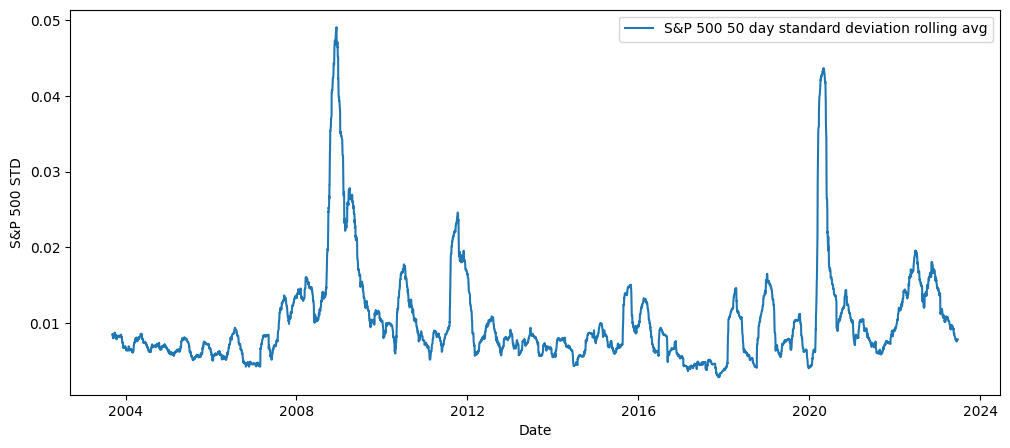

In [5]:
# IP3: Check volatility constant? 
#   - Calculate rolling average 50 of return
#   - Take std of that rolling 
#   - Plot the std of that rolling return

vols = pd.DataFrame(df.SP500.rolling(50).std()).rename(columns={"SP500": "S&P 500 STD"})

# set figure size
plt.figure(figsize=(12, 5))

# plot using rolling average
sns.lineplot(
    x="Date",
    y="S&P 500 STD",
    data=vols,
    label="S&P 500 50 day standard deviation rolling avg",
)
plt.show()

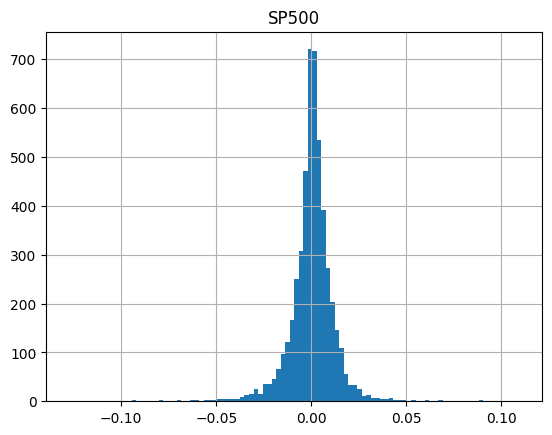

In [6]:
# ND1: Check normally distributed?
# Simply use histogram to plot the return

df.hist(bins=100);

In [7]:
# ND2: Check normally distributed using normaltest

stats.normaltest((np.array(df.SP500)))

'''
Using p_value to compare to determine whether normal distributed or not.
'''

'\nUsing p_value to compare to determine whether normal distributed or not.\n'

In [8]:
# ND3: Skewness and Kurtosis
stats.jarque_bera((np.array(df.SP500))).pvalue

'''
0 means 0% that our data is normally distributed
'''

'\n0 means 0% that our data is normally distributed\n'

In [18]:
# ND4
dfMax = df.SP500.max()
dfMin = df.SP500.min()
dfMaxStdAwayMean = (df.SP500.max() - df.SP500.mean()) / df.SP500.std()
dfMinStdAwayMean = (df.SP500.min() - df.SP500.mean()) / df.SP500.std()
print(
    '''Min return of sample data is %.4f, with %.4f stdv away from the mean.
Max return of sample data is %.4f, with %.4f stdv away from the mean'''
    % (dfMin,dfMinStdAwayMean, dfMax, dfMaxStdAwayMean)
)

Min return of sample data is -0.1277, with -10.5882 stdv away from the mean.
Max return of sample data is 0.1096, with 9.0428 stdv away from the mean


These standard deviations are huge when compared to the normal distribution. We can see this analytically when we plug in the z score to the norm.cdf() method to determine the probability this value could be in a normal distribution:

In [19]:
# ND5 Calculate z-score of a data point
stats.norm.cdf(-10.45)

7.326261431744285e-26

This implies that the chance we could have a move as small as -12.77%, is 7.326261431744285e-26. This probability is so low that we would never expect an event like this to happen in our lifetime. We have multiple events like this, as illustrated by the minimum and maximum.

In normal distribution, based on normal distribution z tables, we would expect 99.7% of our data points to be within +/- 3 standard deviations from the mean. Let's determine this for our sample data. First off, we need to find the cut-off values at +/- 3 standard deviations:

In [22]:
Above3StdAwayFromMean = (3 * df.SP500.std()) + df.SP500.mean()
Below3StdAwayFromMean = (-3 * df.SP500.std()) + df.SP500.mean()

print(Above3StdAwayFromMean)
print(Below3StdAwayFromMean)

0.03654972453956716
-0.03595504356885375


The above two calculations would imply that 99.7% of all of our data points should be in between -0.0364 and 0.03699. Since we have 5,031 data points, we would expect about 15 of them to be outside of that range.

In [23]:
df[(df["SP500"] > 0.03699) | (df["SP500"] < -0.0364)]

,SP500
Date,
2008-03-18,0.041535
2008-09-15,-0.048283
2008-09-17,-0.048288
2008-09-18,0.042429
2008-09-19,0.039467
...,...
2022-04-29,-0.036959
2022-05-18,-0.041234
2022-06-13,-0.039540


## 3. Non-Gaussian Distributions

In [24]:
np.random.seed(555)
stats.t.rvs(df=5030, size=5000)

array([ 0.14771609,  1.16828697,  0.33556735, ...,  0.67286373,
        0.70084191, -0.31366766])

(array([0.00410787, 0.00273858, 0.00410787, 0.0075311 , 0.00890039,
        0.01437756, 0.01848543, 0.02670118, 0.03217835, 0.04381733,
        0.06641064, 0.08626536, 0.1033815 , 0.13008269, 0.1677382 ,
        0.19923191, 0.2245638 , 0.25194963, 0.29713625, 0.32452207,
        0.35601578, 0.39161736, 0.41557996, 0.38066302, 0.36491617,
        0.39777917, 0.38203232, 0.33205318, 0.32109885, 0.25948073,
        0.25263427, 0.22524844, 0.18348505, 0.13145198, 0.12186694,
        0.09174253, 0.06777993, 0.0403941 , 0.04244804, 0.0239626 ,
        0.01506221, 0.01369291, 0.00890039, 0.00273858, 0.00479252,
        0.00342323, 0.        , 0.        , 0.00068465, 0.00068465]),
 array([-3.45444853, -3.30838759, -3.16232665, -3.01626571, -2.87020476,
        -2.72414382, -2.57808288, -2.43202194, -2.28596099, -2.13990005,
        -1.99383911, -1.84777817, -1.70171722, -1.55565628, -1.40959534,
        -1.2635344 , -1.11747345, -0.97141251, -0.82535157, -0.67929063,
        -0.53322968, -0.38

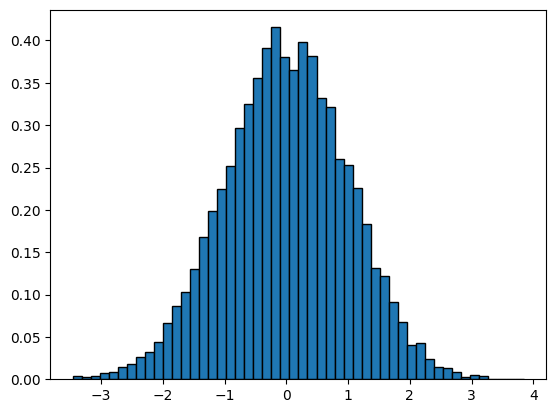

In [25]:
# generate t distribution with sample size 10000
x = stats.t.rvs(df=5030, size=10000)

# create plot of t distribution
plt.hist(x, density=True, edgecolor="black", bins=50)

In [26]:
t_stat, p = stats.ttest_ind(df["SP500"], stats.t.rvs(df=5030, size=5031))
print(f"t={t_stat}, p={p}")

t=-0.20542241732531902, p=0.8372462639903797
